In [124]:
import pandas as pd
import xgboost as xgb

輸入資料

In [149]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.35.csv')

normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.35.csv')

normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]
normalized_train_c.iloc[:, 1::2]

1         3         5         7         9        11        13  \
0    0.229817  0.079642  0.180363  0.182330  0.156993  0.174448  0.170768   
1    0.291908  0.030616  0.219142  0.228138  0.164601  0.270818  0.199887   
2    0.232184  0.261523  0.176360  0.253273  0.083640  0.160268  0.255767   
3    0.029336  0.031738  0.052790  0.075713  0.052144  0.058213  0.056716   
4    0.091505  0.066134  0.126135  0.094016  0.039025  0.152960  0.102249   
..        ...       ...       ...       ...       ...       ...       ...   
383  0.764122  0.802018  0.681363  0.733171  0.763387  0.705546  0.547487   
384  0.121275  0.081696  0.110688  0.171446  0.112948  0.134949  0.153037   
385  0.091843  0.136124  0.203644  0.195833  0.143594  0.238066  0.209942   
386  0.038796  0.026578  0.066475  0.086785  0.027398  0.074352  0.074157   
387  0.092637  0.031542  0.077886  0.175964  0.070239  0.106416  0.105940   

           15        17        19  ...       871       873       875  \
0    0.283547  0.299189  0.173554  ...  0.449892  0.458774  0.521911   
1    0.375387  0.458393  0.213409  ...  0.534952  0.638205  0.639164   
2    0.303536  0.293903  0.222740  ...  0.289883  0.546645  0.672614   
3    0.066261  0.170566  0.056618  ...  0.026199  0.572295  0.576746   
4    0.141194  0.188816  0.097161  ...  0.137059  0.407397  0.644003   
..        ...       ...       ...  ...       ...       ...       ...   
383  0.602316  0.632164  0.740336  ...  0.171589  0.397560  0.320598   
384  0.237831  0.285269  0.091441  ...  0.518803  0.472428  0.611537   
385  0.229587  0.364792  0.156817  ...  0.632314  0.556940  0.573351   
386  0.110486  0.311376  0.056696  ...  0.624071  0.259748  0.474603   
387  0.261032  0.337599  0.142312  ...  0.133938  0.447262  0.560612   

          877       879       881       883       885       887       889  
0    0.598626  0.693420  0.787966  0.717043  0.732963  0.653539  0.324511  
1    0.671331  0.771944  0.790363  0.774816  0.738141  0.780185  0.721786  
2    0.234349  0.390155  0.913858  0.757479  0.796541  0.798998  0.744522  
3    0.598656  0.672597  0.793958  0.713349  0.809180  0.798897  0.584788  
4    0.532681  0.693918  0.726509  0.795497  0.632736  0.779592  0.643527  
..        ...       ...       ...       ...       ...       ...       ...  
383  0.571565  0.534010  0.350722  0.452917  0.151184  0.187659  0.135017  
384  0.670871  0.675090  0.803484  0.667731  0.769422  0.800810  0.490387  
385  0.704461  0.656891  0.676926  0.764431  0.747612  0.748412  0.542001  
386  0.699927  0.675970  0.858644  0.647373  0.768265  0.758530  0.380202  
387  0.600695  0.735972  0.715845  0.444287  0.165877  0.790922  0.375622  

[388 rows x 445 columns]

In [153]:
X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(445):
    X = X_train.iloc[:, i]

    X = X.values.flatten().T.tolist()
    print(X)
    x.append(X)

y = [ (0 if i < 47 else 1)  for i in range(445)]

[0.229816513761468, 0.291907975134159, 0.232183908045977, 0.0293363714041584, 0.0915049816465653, 0.05370670995671, 0.142394822006472, 0.0598320917583067, 0.0383959044368601, 0.12198559348575, 0.0584831380733292, 0.100923545653623, 0.248870164687859, 0.14317614606594, 0.0673360427125667, 0.0276088425523699, 0.105481142051463, 0.0526907630522088, 0.0564265755976405, 0.11117188568303, 0.0829338446788111, 0.0696517412935323, 0.0274843182568504, 0.883153715258083, 0.0924376920450666, 0.127524429967427, 0.0874951355558438, 0.110653138871275, 0.0986358866736621, 0.111047180667434, 0.0798459887647542, 0.0319507082512863, 0.0552278820375335, 0.232323232323232, 0.0929197384893587, 0.115180063820088, 0.0922519913106445, 0.0998147967638171, 0.0454509209791883, 0.0272300469483568, 0.0617695025822234, 0.079294738827079, 0.0622713738834538, 0.0578848325178773, 0.0245200698080279, 0.0824026562028373, 0.245563286685951, 0.0705340977670489, 0.0383516931864545, 0.0992771084337349, 0.149641000247586, 0.0

In [141]:
x

[[0.229816513761468,
  0.291907975134159,
  0.232183908045977,
  0.0293363714041584,
  0.0915049816465653,
  0.05370670995671,
  0.142394822006472,
  0.0598320917583067,
  0.0383959044368601,
  0.12198559348575,
  0.0584831380733292,
  0.100923545653623,
  0.248870164687859,
  0.14317614606594,
  0.0673360427125667,
  0.0276088425523699,
  0.105481142051463,
  0.0526907630522088,
  0.0564265755976405,
  0.11117188568303,
  0.0829338446788111,
  0.0696517412935323,
  0.0274843182568504,
  0.883153715258083,
  0.0924376920450666,
  0.127524429967427,
  0.0874951355558438,
  0.110653138871275,
  0.0986358866736621,
  0.111047180667434,
  0.0798459887647542,
  0.0319507082512863,
  0.0552278820375335,
  0.232323232323232,
  0.0929197384893587,
  0.115180063820088,
  0.0922519913106445,
  0.0998147967638171,
  0.0454509209791883,
  0.0272300469483568,
  0.0617695025822234,
  0.079294738827079,
  0.0622713738834538,
  0.0578848325178773,
  0.0245200698080279,
  0.0824026562028373,
  0.245563

In [ ]:
from sklearn.model_selection import cross_val_score

# 將數據轉換為DMatrix格式
dmatrix = xgb.DMatrix(x, label=y)

# 定義模型參數
params = {
    'objective': 'binary:logistic',  # 二分類問題
    'eval_metric': 'logloss',  # 評估指標
    'max_depth': 3,
    'learning_rate': 1
}

# 建立模型
model = xgb.XGBClassifier(**params)

# 進行交叉驗證，這裡使用 5-fold 交叉驗證
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# 印出每次交叉驗證的準確度
print("各次交叉驗證的準確度:", cv_scores)

# 計算平均準確度
average_accuracy = cv_scores.mean()
print("平均交叉驗證準確度:", average_accuracy)


In [ ]:
from itertools import combinations

target_labels = ['cg03520644','cg05047401','cg06355129','cg07790615','cg09106903']

# 三個一組
combinations_list = list(combinations(target_labels, 3))

acc=[]
# 所有可能的組合
for combination in combinations_list:
    #print(combination)
    d1_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[0]]
    d2_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[1]]
    d3_values = normalized_train.loc[normalized_train['Unnamed: 0']==combination[2]]
   
    d1 = d1_values.iloc[:, 1::2]
    d2 = d2_values.iloc[:, 1::2]
    d3 = d3_values.iloc[:, 1::2]

    d1 = d1.values.flatten().tolist()
    d2 = d2.values.flatten().tolist()
    d3 = d3.values.flatten().tolist()

    x = []

    for i in range(445):
        x.append([d1[i],d2[i],d3[i]])
        
    # 將數據轉換為DMatrix格式
    dmatrix = xgb.DMatrix(x, label=y)

    # 定義模型參數
    params = {
        'objective': 'binary:logistic',  # 二分類問題
        'eval_metric': 'logloss',  # 評估指標
        'max_depth': 3,
        'learning_rate': 1
    }

    # 建立模型
    model = xgb.XGBClassifier(**params)

    # 進行交叉驗證，這裡使用 5-fold 交叉驗證
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

    # 印出每次交叉驗證的準確度
    #print("各次交叉驗證的準確度:", cv_scores)

    # 計算平均準確度
    average_accuracy = cv_scores.mean()
    #print("平均交叉驗證準確度:", average_accuracy)
    acc.append([combination[0],combination[1], combination[2], cv_scores[0],cv_scores[1],cv_scores[2],cv_scores[3],cv_scores[4], average_accuracy])


In [ ]:
df=pd.DataFrame(acc, columns=['ID1', 'ID2', 'ID3', 'fold_scores1','fold_scores2','fold_scores3','fold_scores4','fold_scores5', 'average_accuracy'])
df.to_csv("../result/xgb.csv", index=False)

使用RFECV決定最佳選擇位點數  
RFE 篩選到剩下RFECV決定的最佳選擇位點數，可得知最好的是哪一個位點、預測精準度

In [210]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.feature_selection import RFECV,RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

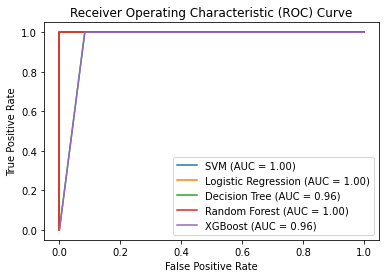

                 Model Features  Accuracy  \
0                  SVM       89  1.000000   
1  Logistic Regression       23  1.000000   
2        Decision Tree        2  0.988764   
3        Random Forest      355  1.000000   
4              XGBoost        2  0.988764   

                                   Selected Features  
0       Unnamed: 0
1    cg05047401
2    cg0635512...  
1       Unnamed: 0
30   cg16768018
57   cg1867509...  
2         Unnamed: 0
57   cg18675097
332  cg21253043  
3       Unnamed: 0
1    cg05047401
2    cg0635512...  
4         Unnamed: 0
146  cg14231297
149  cg25352836  


In [234]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

results = pd.DataFrame(columns=['Model', 'Features', 'Accuracy'])
#[5,10,15,20]
# 開始迴圈測試
for model_name, model in models.items():
    if model_name=='SVM':
            svc = SVC(kernel="linear")
            # 定義要測試的特徵數量
            feature_counts = [89]
            model=svc

    elif model_name=='Logistic Regression':
        logreg_clf = LogisticRegression()
        feature_counts = [23]
        model=logreg_clf

    elif model_name=='Decision Tree':
        dt_clf = DecisionTreeClassifier()
        feature_counts = [2]
        model=dt_clf

    elif model_name=='Random Forest':
        rf_clf = RandomForestClassifier()
        feature_counts = [355]
        model=rf_clf

    elif model_name=='XGBoost':
        xgb_clf = XGBClassifier()
        feature_counts = [2]
        model=xgb_clf

    for feature_count in feature_counts:
        
        # 使用 RFE 選擇特徵
        rfe = RFE(estimator=model, n_features_to_select=feature_count)
        X_train_rfe = rfe.fit_transform(X_train, y_train)

        selected_feature_indices = rfe.support_
        X_train_df = pd.DataFrame(X_train)
        selected_feature_names = pd.DataFrame(normalized_train_c.iloc[selected_feature_indices,0])

        feature_ranking = rfe.ranking_
        # print("Feature Ranking:\n", feature_ranking)


        model.fit(X_train_rfe, y_train)

        # 在測試集上進行預測
        X_test_rfe = rfe.transform(X_test)
        y_pred = model.predict(X_test_rfe)

        accuracy = accuracy_score(y_test, y_pred)

        results = results.append({'Model': model_name, 'Features': feature_count,'Selected Features': selected_feature_names, 'Accuracy': accuracy}, ignore_index=True)

        # 計算 ROC 曲線的參數
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        # 繪製 ROC 曲線
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# 添加圖例
plt.legend(loc="lower right")

# 添加標籤
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")

# 顯示圖表
plt.show()



# 顯示結果
print(results)


In [229]:
results.to_csv("../result/RFE&ml.csv",index=False)

5
Optimal Number of Features: 4
cross validation acc 0.9865168539325844


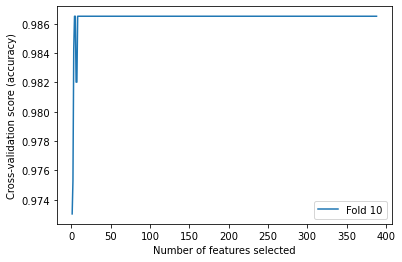

In [233]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=None, random_state=42)

models = {
    # 'SVM': SVC(), #4 fold=5
    # 'Logistic Regression': LogisticRegression(), #5 fold=5
    # 'Decision Tree': DecisionTreeClassifier(), #3
    # 'Random Forest': RandomForestClassifier(), #355
    'XGBoost': XGBClassifier() #2
}


# 開始迴圈測試
for model_name, model in models.items():
    if model_name=='SVM':
            svc = SVC(kernel="linear")
            model=svc

    elif model_name=='Logistic Regression':
        logreg_clf = LogisticRegression()
        model=logreg_clf

    elif model_name=='Decision Tree':
        dt_clf = DecisionTreeClassifier()
        model=dt_clf

    elif model_name=='Random Forest':
        rf_clf = RandomForestClassifier()
        model=rf_clf

    elif model_name=='XGBoost':
        xgb_clf = XGBClassifier()
        model=xgb_clf

    # for fold in range(2,11):
        # 初始化 StratifiedKFold
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        print(stratified_kfold.get_n_splits(x, y))

        # 初始化RFECV，cv參數是交叉驗證的次數，可以選擇StratifiedKFold或其他交叉驗證方法
        rfecv = RFECV(estimator=model, step=1, cv=stratified_kfold, scoring='accuracy')
        X_train_rfecv = rfecv.fit(x, y)

        # for i, (train_index, test_index) in enumerate(stratified_kfold.split(x, y)):
            # print(f"Fold {i}:")
            # print(f"  Train: index={train_index}")
            # print(f"  Test:  index={test_index}")


        print("Optimal Number of Features:", X_train_rfecv.n_features_)
        # print("Feature Rankings:", X_train_rfecv.ranking_)
        # print("Feature Select:",X_train_rfecv.support_)
        print("cross validation acc",max(X_train_rfecv.grid_scores_))

        # 绘制特征排名的图表
        plt.plot(range(1, len(X_train_rfecv.grid_scores_) + 1), X_train_rfecv.grid_scores_, label=f"Fold {fold}")
        

    # 繪製特徵排名的圖表
    import matplotlib.pyplot as plt

    # plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation score (accuracy)")
    # plt.plot(range(1, len(X_train_rfecv.grid_scores_) + 1), X_train_rfecv.grid_scores_)
    plt.legend(loc="lower right")
    plt.show()

In [145]:
pd.DataFrame(X_train).to_csv("../result/traindata.csv",index=False)

In [161]:
print(pd.DataFrame(x).shape,pd.DataFrame(y).shape)


(445, 388) (445, 1)


In [209]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = XGBClassifier()  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(x, y):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print([X_val_fold])

    # 使用 RFE 選擇特徵
    rfe = RFE(estimator=model, n_features_to_select=3)
    X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)



    # 训练模型
    model.fit(X_train_rfe, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba([X_val_fold])[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


[          0         1         2         3         4         5         6    \
6    0.170768  0.199887  0.255767  0.056716  0.102249  0.044903  0.187853   
8    0.299189  0.458393  0.293903  0.170566  0.188816  0.370785  0.359207   
10   0.204109  0.375028  0.115174  0.052321  0.103106  0.033036  0.146484   
11   0.155530  0.260327  0.176552  0.067964  0.093957  0.071545  0.165619   
12   0.307168  0.360466  0.183212  0.084580  0.135532  0.047411  0.203698   
..        ...       ...       ...       ...       ...       ...       ...   
432  0.663616  0.775119  0.815239  0.587835  0.786834  0.073121  0.166761   
435  0.449892  0.534952  0.289883  0.026199  0.137059  0.074741  0.604136   
438  0.598626  0.671331  0.234349  0.598656  0.532681  0.633566  0.512477   
442  0.732963  0.738141  0.796541  0.809180  0.632736  0.733297  0.777430   
444  0.324511  0.721786  0.744522  0.584788  0.643527  0.594879  0.541767   

          7         8         9    ...       378       379       380  \
6 

ValueError: Feature shape mismatch, expected: 3, got 149

X_val_fold:           0         1         2         3         4         5         6    \
9    0.173554  0.213409  0.222740  0.056618  0.097161  0.055847  0.135236   
36   0.325880  0.417892  0.219825  0.153593  0.091250  0.219789  0.259301   
40   0.136652  0.147206  0.189410  0.036510  0.154045  0.052299  0.089082   
47   0.605094  0.735374  0.753630  0.354931  0.084896  0.047181  0.411514   
52   0.295306  0.508386  0.570681  0.454785  0.419158  0.596331  0.506934   
58   0.541945  0.554896  0.554986  0.458985  0.121212  0.063574  0.574994   
67   0.490638  0.668836  0.619497  0.611473  0.457718  0.605595  0.623305   
84   0.387933  0.506824  0.554626  0.334977  0.316342  0.462037  0.493726   
89   0.630988  0.708510  0.761166  0.694207  0.409451  0.577298  0.600016   
92   0.726781  0.796299  0.877839  0.816282  0.502884  0.715370  0.627560   
96   0.388534  0.673131  0.537843  0.638337  0.329951  0.642910  0.636406   
110  0.488635  0.563745  0.156953  0.206482  0.137879  0.055409 

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



X_val_fold:           0         1         2         3         4         5         6    \
11   0.155530  0.260327  0.176552  0.067964  0.093957  0.071545  0.165619   
12   0.307168  0.360466  0.183212  0.084580  0.135532  0.047411  0.203698   
18   0.269483  0.307047  0.263387  0.068389  0.134309  0.105068  0.232443   
23   0.372416  0.458925  0.205529  0.052111  0.260253  0.034309  0.150242   
26   0.143966  0.100478  0.212089  0.031120  0.087575  0.059233  0.107537   
29   0.193951  0.143059  0.179487  0.057070  0.089293  0.050031  0.120191   
32   0.224155  0.220029  0.230415  0.078212  0.141789  0.111305  0.240672   
38   0.230650  0.344885  0.140067  0.060218  0.189272  0.052763  0.167210   
41   0.185269  0.297119  0.233917  0.048233  0.164075  0.050236  0.100765   
42   0.163490  0.191471  0.114745  0.048193  0.121121  0.040591  0.077921   
44   0.190548  0.356511  0.179153  0.088858  0.176918  0.074579  0.141604   
50   0.804309  0.794471  0.776196  0.727029  0.553810  0.711406

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



X_val_fold:           0         1         2         3         4         5         6    \
0    0.229817  0.291908  0.232184  0.029336  0.091505  0.053707  0.142395   
27   0.207618  0.330837  0.130443  0.042059  0.083845  0.047574  0.131227   
60   0.481053  0.623882  0.333025  0.761517  0.381486  0.657501  0.574894   
63   0.659176  0.743945  0.610775  0.409152  0.047258  0.055110  0.276349   
73   0.680127  0.673082  0.586082  0.114255  0.703102  0.036120  0.469834   
106  0.489865  0.630388  0.634904  0.548352  0.618312  0.630994  0.510088   
108  0.668157  0.711921  0.808610  0.748879  0.661552  0.395085  0.659176   
122  0.596411  0.588434  0.268268  0.182243  0.296194  0.134172  0.443664   
130  0.764031  0.706155  0.076798  0.766041  0.740797  0.044744  0.691407   
136  0.475576  0.604709  0.564350  0.506351  0.565408  0.561891  0.510887   
140  0.607867  0.668222  0.783849  0.540796  0.552568  0.607534  0.613144   
145  0.656095  0.659455  0.673653  0.567331  0.631034  0.680273

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


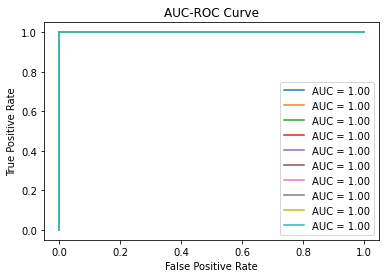

In [207]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = SVC(probability=True)  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print("X_val_fold:",X_val_fold)
    # 训练模型
    model.fit(X_train_fold, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba(X_val_fold)[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()
